In [9]:
!pip install tensorflow numpy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 19.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 188.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 103.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 167.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 144.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 145.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 147.2 MB/s eta 0:00:0000:01
   ━━━━━━━━

In [3]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np
import os
import pandas as pd

In [1]:
with zipfile.ZipFile('profile_photos_category.zip', 'r') as zip_ref:
    zip_ref.extractall('profile_photos_category')

In [6]:
images = os.listdir('profile_photos_category/profile_photos_category')

In [8]:
len(images)

22578

In [ ]:
#extract features using vgg-16

#load the model
error_images = []
model = VGG16(weights='imagenet', include_top=True)
#model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#make a dataframe with first column image name and second column image features
df = pd.DataFrame(columns=['image', 'features'])
#extract features
for img_d in images:
    #try:
    img = image.load_img('profile_photos_category/profile_photos_category/' + img_d, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature = model.predict(img_data)
    new_data = pd.DataFrame({'image': [img_d], 'features': [vgg16_feature]})
    # Use pd.concat to append the new data
    df = pd.concat([df, new_data], ignore_index=True)
    #except:
        #print('Error with image: ' + img_d)
        #error_images.append(img_d)
        #continue

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [24]:
df

,image,features
0,"0002f3da-1303-4ad6-8b6e-fbd809a866a4._CR80,0,3...","[[1.8830634e-06, 8.598664e-05, 1.6070119e-06, ..."
1,"00059cf5-827d-488c-b8fe-a02e09f64e90._CR0,0,50...","[[3.449234e-05, 0.00012922204, 0.0011176519, 0..."
2,"000750a9-c34e-4865-becc-7c8a5bc8a2f0._CR0,0,37...","[[3.37372e-06, 9.174543e-06, 7.760663e-06, 2.0..."
3,"00096ca4-fb0c-47a5-b93a-5e5edeb9940f._CR0,0,10...","[[1.2564824e-05, 0.00045120707, 0.0023933575, ..."
4,"000cdeeb-b7b4-4063-8ab6-456122b0344b._CR0,0,37...","[[3.3082745e-06, 2.0290699e-07, 2.380736e-05, ..."
5,"000cfcf9-7fb9-4ee6-84c1-238a26524e70._CR0,0,37...","[[0.000502309, 1.5079777e-06, 0.0014026914, 6...."
6,"001357ec-6a49-4a02-9e48-0431a3e106ca._CR0,0,54...","[[5.5810284e-07, 2.906402e-05, 2.8732704e-05, ..."
7,"002212d6-3ad3-4537-8329-2b3f4b9e6454._CR62,0,3...","[[1.1555855e-05, 6.8125014e-06, 0.00011448002,..."
8,"00263b57-7398-4e50-b703-32af0a04a07f._CR62,0,3...","[[0.000373796, 0.00022784757, 0.00017434555, 3..."
9,"002cc6b2-8f40-4fc8-8f86-99461213d94e._CR0,0,76...","[[6.65403e-05, 2.3183995e-06, 0.00014130957, 0..."


In [10]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

2024-05-02 08:39:05.277239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-02 08:39:06.062935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['/device:GPU:0']


2024-05-02 08:39:07.161466: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /device:GPU:0 with 22287 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:a1:00.0, compute capability: 8.9


# consumer photos

In [4]:
#load consumer photos
cp_photos = os.listdir('../../gen/output/consumer_photos_category')

In [5]:
len(cp_photos)

26104

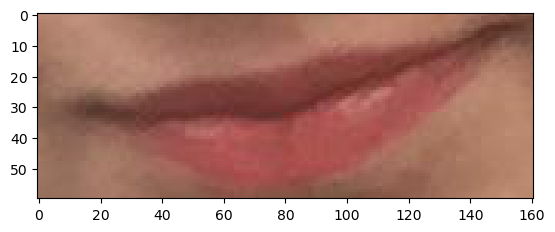

In [5]:
#show first pic
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../../gen/output/consumer_photos_category/' + cp_photos[0])
plt.imshow(img)

In [13]:
max(img.size)

161

In [6]:
from PIL import Image

def resize_with_padding(image):
    width, height = image.size
    target_width, target_height = (max(img.size), max(img.size))
    
    # Calculate ratios for resizing
    width_ratio = target_width / width
    height_ratio = target_height / height
    
    # Choose the smaller ratio to resize uniformly
    ratio = min(width_ratio, height_ratio)
    new_width = int(width * ratio)
    new_height = int(height * ratio)
    
    # Resize the image
    resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)
    
    # Create a new background image with padding
    padded_img = Image.new("RGB", (target_width, target_height), (255, 255, 255))
    x_offset = (target_width - new_width) // 2
    y_offset = (target_height - new_height) // 2
    padded_img.paste(resized_img, (x_offset, y_offset))
    
    return padded_img

# Example usage
input_image_path = '../../gen/output/consumer_photos_category/' + cp_photos[2]  # Replace with your input image path
original_image = Image.open(input_image_path)
output_image = resize_with_padding(original_image)
output_image_resized = output_image.resize((224, 224))


C:\Users\janva\AppData\Local\Temp\ipykernel_18572\3920346710.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


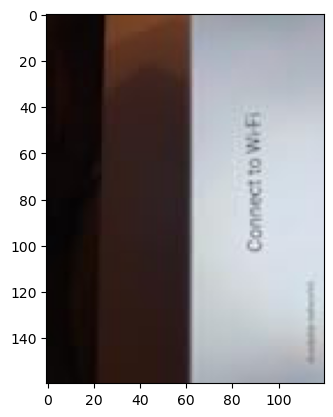

In [23]:
#show output image
plt.imshow(original_image)

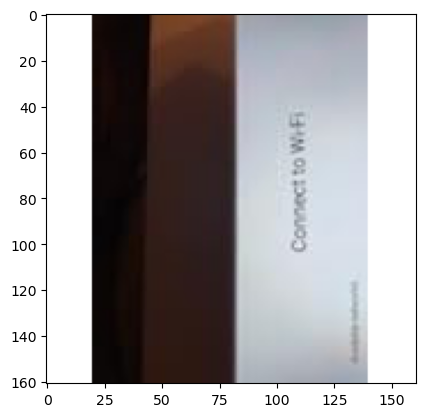

In [24]:
plt.imshow(output_image)

In [25]:
#output image to 224x224
output_image_resized = output_image.resize((224, 224))

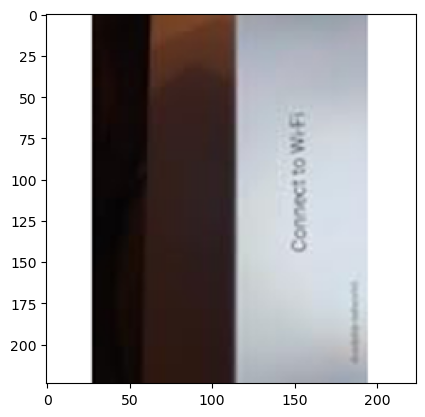

In [26]:
plt.imshow(output_image_resized)

In [7]:
from PIL import Image

def center_crop(image_d):
    new_width =  min(image_d.size)
    new_height =  min(image_d.size)
    width, height = image_d.size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    return image_d.crop((left, top, right, bottom))

# Load image
original_image = Image.open('../../gen/output/consumer_photos_category/' + cp_photos[2])

# Perform center cropping
cropped_image = center_crop(original_image)

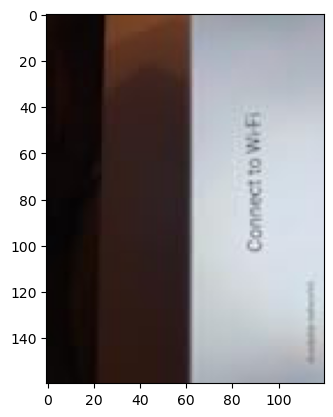

In [39]:
#show orginal
plt.imshow(original_image)

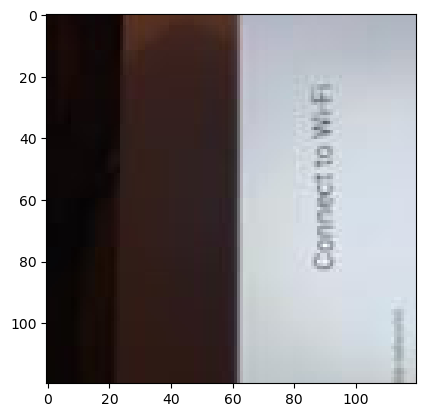

In [40]:
#show cropped
plt.imshow(cropped_image)

In [41]:
#load the model
model = VGG16(weights='imagenet', include_top=True)
#model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#make a dataframe with first column image name and second column image features
df = pd.DataFrame(columns=['image', 'features_resized', 'features_cropped'])
#extract features
i = 0
for img_d in cp_photos[0:5]:
    #try:
    input_image_path = '../../gen/output/consumer_photos_category/' + img_d
    original_image = Image.open(input_image_path)

    # Resize with padding
    output_image = resize_with_padding(original_image)
    output_image_resized = output_image.resize((224, 224))
    img_data = image.img_to_array(output_image_resized)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature_resized = model.predict(img_data)

    # Perform center cropping
    cropped_image = center_crop(original_image)
    cropped_image_resized = cropped_image.resize((224, 224))
    img_data = image.img_to_array(cropped_image_resized)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg16_feature_cropped = model.predict(img_data)

    new_data = pd.DataFrame({'image': [img_d], 'features_resized': [vgg16_feature_resized], 'features_cropped': [vgg16_feature_cropped]})
    # Use pd.concat to append the new data
    df = pd.concat([df, new_data], ignore_index=True)
    if i % 100 == 0:
        print(i, " / ", len(cp_photos))
    i += 1

C:\Users\janva\AppData\Local\Temp\ipykernel_29652\2313056004.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


1/1 [==============================] - 0s 293ms/step
0  /  26104


C:\Users\janva\AppData\Local\Temp\ipykernel_29652\2313056004.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


1/1 [==============================] - 0s 322ms/step


C:\Users\janva\AppData\Local\Temp\ipykernel_29652\2313056004.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


1/1 [==============================] - 0s 285ms/step


C:\Users\janva\AppData\Local\Temp\ipykernel_29652\2313056004.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


1/1 [==============================] - 0s 289ms/step


C:\Users\janva\AppData\Local\Temp\ipykernel_29652\2313056004.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


1/1 [==============================] - 0s 288ms/step


In [44]:
df

,image,features_resized,features_cropped
0,017UGkhnC6L._SL1600_.jpg,"[[9.891583e-05, 0.000108469656, 4.6259025e-05,...","[[0.0001197944, 0.0009924262, 0.00017458739, 0..."
1,01MC0VgxI+L._SL1600_.jpg,"[[1.6154134e-05, 3.321695e-05, 1.6656139e-06, ...","[[6.8770432e-06, 1.6559115e-05, 8.1531147e-07,..."
2,01oHJ0IV7mL._SL1600_.jpg,"[[8.736603e-07, 7.977875e-05, 9.954457e-07, 4....","[[4.0036894e-06, 0.00017076812, 1.4262625e-06,..."
3,01q7DqkTOzL._SL1600_.jpg,"[[2.5852316e-05, 0.0003461579, 0.001411208, 0....","[[2.654381e-05, 0.00031693187, 0.0015349697, 0..."
4,114oVXiOAQL._SL1600_.jpg,"[[7.827159e-08, 9.861413e-07, 1.6199953e-08, 6...","[[1.2500625e-06, 1.6145039e-05, 3.166799e-07, ..."


# Create blank image

In [9]:
#load the model
model = VGG16(weights='imagenet', include_top=True)
#model = Model(inputs=model.input, outputs=model.get_layer('fc2').output)
#make a dataframe with first column image name and second column image features
df = pd.DataFrame(columns=['image', 'features_resized', 'features_cropped'])
#extract features
i = 0
#try:
#create a completely blank image
original_image = Image.new('RGB', (224, 224), color = 'white')

# Resize with padding
output_image = resize_with_padding(original_image)
output_image_resized = output_image.resize((224, 224))
img_data = image.img_to_array(output_image_resized)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature_resized = model.predict(img_data)

# Perform center cropping
cropped_image = center_crop(original_image)
cropped_image_resized = cropped_image.resize((224, 224))
img_data = image.img_to_array(cropped_image_resized)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature_cropped = model.predict(img_data)

new_data = pd.DataFrame({'image': ['blank'], 'features_resized': [vgg16_feature_resized], 'features_cropped': [vgg16_feature_cropped]})
# Use pd.concat to append the new data
df = pd.concat([df, new_data], ignore_index=True)

C:\Users\janva\AppData\Local\Temp\ipykernel_18572\3920346710.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = image.resize((new_width, new_height), Image.ANTIALIAS)


1/1 [==============================] - 0s 264ms/step


In [14]:
# check if df['feature_resized'] == df['feature_cropped']
df['features_resized'][0][0]

array([2.47660704e-04, 3.11188516e-04, 1.08252949e-04, 1.58477007e-04,
       3.40921222e-04, 6.74827606e-04, 1.41805969e-04, 2.55779014e-04,
       1.95525266e-04, 3.39459919e-04, 2.84592883e-04, 2.57932057e-04,
       2.77029641e-04, 2.38717024e-04, 2.44814117e-04, 4.19710937e-04,
       7.70928862e-04, 2.25769196e-04, 4.54371591e-04, 3.53003939e-04,
       1.72682790e-04, 2.44228961e-03, 1.22743612e-03, 4.16515657e-04,
       2.35517407e-04, 5.29945362e-04, 3.20305029e-04, 5.64623449e-04,
       8.88840412e-04, 2.46083888e-04, 9.12303949e-05, 1.82994743e-04,
       1.63955643e-04, 1.00855228e-04, 2.33879240e-04, 5.14349376e-05,
       1.55805043e-04, 8.54957616e-05, 9.92817921e-04, 1.58499213e-04,
       2.41390706e-04, 3.40643193e-04, 2.75842787e-04, 2.09661084e-04,
       2.64057802e-04, 3.39442660e-04, 2.70633172e-04, 2.84032663e-04,
       7.50688414e-05, 9.18740552e-05, 1.24535713e-04, 5.02542534e-04,
       6.97638839e-04, 6.90627785e-04, 2.22029252e-04, 1.56725117e-04,
      